In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [20]:
# load the data
email_rec = pd.read_csv("Spam.txt",  sep = ',', header= None )
print(email_rec.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


In [21]:
# renaming the columns
email_rec.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
print(email_rec.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [22]:
email_rec.shape

(4601, 58)

In [23]:
email_rec.spam.value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [24]:
1813/(1813+2788)

0.39404477287546186

In [25]:
email_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [26]:
# splitting into X and y
X = email_rec.drop("spam", axis = 1)
y = email_rec.spam.values.astype(int)

In [27]:
from sklearn.preprocessing import scale
X = scale(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [29]:
model = SVC(C=1, kernel = "linear")

In [30]:
model.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [32]:
model.support_vectors_.shape

(627, 57)

In [37]:
np.round(model.decision_function(model.support_vectors_), 2)

(627,)

In [38]:
pred = model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test, pred)

array([[807,  42],
       [ 57, 475]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       849
           1       0.92      0.89      0.91       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



In [45]:
model = SVC(C=1000, kernel = "linear")
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       849
           1       0.93      0.89      0.91       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381



In [46]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC(kernel = 'linear')

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)     

In [47]:
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='accuracy', verbose=1)

In [48]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.088447,0.004252,0.011871,0.000896,0.1,{'C': 0.1},0.916149,0.933230,0.917702,0.930124,...,0.927329,0.009022,5,0.936335,0.933618,0.935171,0.937888,0.930124,0.934627,0.002651
1,0.184912,0.008889,0.010327,0.000731,1,{'C': 1},0.923913,0.931677,0.927019,0.931677,...,0.930435,0.004751,4,0.941382,0.935559,0.939441,0.938276,0.936335,0.938199,0.002103
2,0.996502,0.232544,0.009835,0.000518,10,{'C': 10},0.923913,0.933230,0.928571,0.934783,...,0.931366,0.004543,2,0.942935,0.935559,0.940217,0.939829,0.937888,0.939286,0.002463
3,8.687446,2.098421,0.010021,0.000709,100,{'C': 100},0.922360,0.936335,0.927019,0.937888,...,0.931988,0.006164,1,0.942935,0.937112,0.941382,0.939441,0.938665,0.939907,0.002045
4,82.445584,28.000518,0.009304,0.000412,1000,{'C': 1000},0.922360,0.933230,0.928571,0.936335,...,0.931056,0.005065,3,0.944099,0.935947,0.940217,0.939829,0.938276,0.939674,0.002674


In [53]:
model = SVC(C=1000, kernel = "poly")
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       849
           1       0.91      0.86      0.88       532

    accuracy                           0.91      1381
   macro avg       0.91      0.90      0.91      1381
weighted avg       0.91      0.91      0.91      1381



In [54]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC(kernel = 'poly')

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True) 

In [55]:
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='accuracy', verbose=1)

In [56]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.222627,0.010990,0.041303,0.000836,0.1,{'C': 0.1},0.667702,0.690994,0.683230,0.675466,...,0.682919,0.010550,5,0.697981,0.691770,0.688276,0.694488,0.693323,0.693168,0.003188
1,0.195046,0.005001,0.034526,0.001783,1,{'C': 1},0.740683,0.784161,0.756211,0.734472,...,0.757764,0.018839,4,0.782220,0.778339,0.772904,0.787267,0.781444,0.780435,0.004733
2,0.169818,0.006572,0.025274,0.001093,10,{'C': 10},0.827640,0.871118,0.854037,0.822981,...,0.849068,0.020351,3,0.895963,0.892081,0.885870,0.889363,0.893245,0.891304,0.003446
3,0.140436,0.012864,0.018232,0.001212,100,{'C': 100},0.902174,0.914596,0.923913,0.905280,...,0.914286,0.009440,2,0.967780,0.964286,0.964286,0.961568,0.967780,0.965140,0.002373
4,0.148610,0.011117,0.014143,0.001003,1000,{'C': 1000},0.905280,0.920807,0.930124,0.925466,...,0.922981,0.009801,1,0.991071,0.988742,0.987966,0.986801,0.989519,0.988820,0.001440


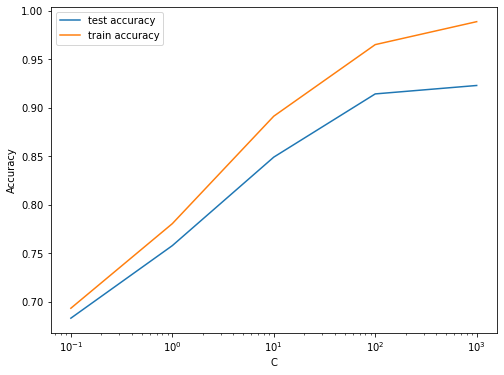

In [57]:

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [58]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC(kernel = 'rbf')

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True) 

In [59]:
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [60]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.192877,0.005449,0.091176,0.001935,0.1,{'C': 0.1},0.895963,0.902174,0.906832,0.902174,...,0.905280,0.007795,5,0.912655,0.911879,0.912267,0.911102,0.906056,0.910792,0.002423
1,0.130776,0.005344,0.053758,0.001244,1,{'C': 1},0.917702,0.940994,0.920807,0.930124,...,0.929814,0.009440,2,0.951475,0.946040,0.949922,0.946040,0.945652,0.947826,0.002401
2,0.111423,0.006116,0.043468,0.001753,10,{'C': 10},0.908385,0.944099,0.933230,0.928571,...,0.930745,0.012368,1,0.975543,0.970885,0.973991,0.968944,0.971273,0.972127,0.002347
3,0.134848,0.007179,0.039599,0.002341,100,{'C': 100},0.913043,0.927019,0.936335,0.930124,...,0.928571,0.008562,3,0.989519,0.989907,0.989907,0.988354,0.987966,0.989130,0.000814
4,0.185980,0.026315,0.037048,0.003222,1000,{'C': 1000},0.908385,0.931677,0.922360,0.919255,...,0.920497,0.007440,4,0.996118,0.993789,0.994177,0.993789,0.994177,0.994410,0.000872


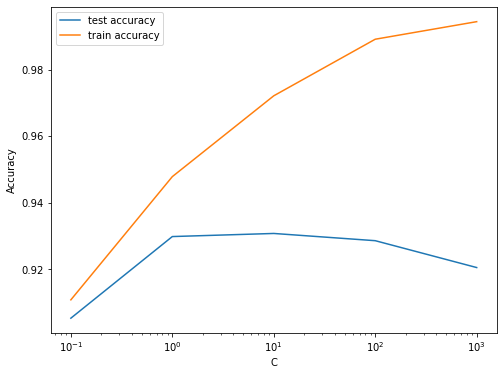

In [61]:

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [62]:
# specify range of parameters (C) as a list
params = {"gamma": [0.01, 0.1, 1, 10, 100]}

model = SVC(C = 1, kernel = 'rbf')

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True) 

In [63]:
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(C=1), param_grid={'gamma': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [64]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.120890,0.004511,0.052205,0.001257,0.01,{'gamma': 0.01},0.917702,0.939441,0.922360,0.931677,...,0.929814,0.008528,1,0.943323,0.940994,0.945264,0.937112,0.939829,0.941304,0.002814
1,0.227079,0.003189,0.093112,0.001264,0.1,{'gamma': 0.1},0.888199,0.895963,0.889752,0.911491,...,0.900621,0.011866,2,0.977873,0.973602,0.975543,0.974767,0.973214,0.975000,0.001658
2,0.393130,0.009283,0.154095,0.000617,1,{'gamma': 1},0.770186,0.776398,0.785714,0.784161,...,0.780435,0.006180,3,0.996506,0.994177,0.994177,0.994565,0.994177,0.994720,0.000905
3,0.516269,0.013208,0.222316,0.038424,10,{'gamma': 10},0.728261,0.734472,0.739130,0.728261,...,0.733540,0.004564,4,0.998835,0.996894,0.998059,0.997671,0.997671,0.997826,0.000631
4,0.571748,0.008973,0.219110,0.001185,100,{'gamma': 100},0.704969,0.708075,0.712733,0.706522,...,0.709006,0.003197,5,0.999224,0.998059,0.998835,0.998059,0.998447,0.998525,0.000453


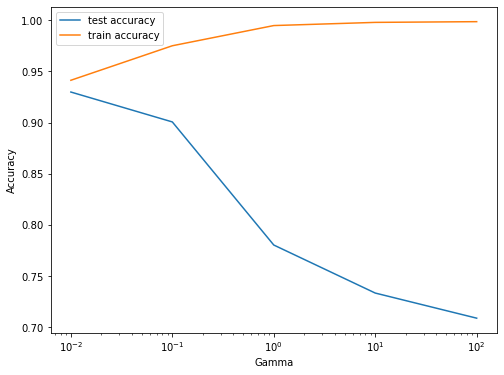

In [66]:

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_gamma'], cv_results['mean_test_score'])
plt.plot(cv_results['param_gamma'], cv_results['mean_train_score'])
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [68]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100],
    "gamma": [0.01, 0.1, 1],
        "kernel" : ['linear', 'poly','rbf'] }

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True) 

In [69]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [70]:
model_cv.best_estimator_

SVC(C=10, gamma=0.01)

In [71]:
model_cv.best_score_

0.9332298136645963

In [ ]:
model_cv

In [72]:
pred = model_cv.predict(X_test)

In [73]:
print(confusion_matrix(y_pred, pred))

[[845  19]
 [ 20 497]]


In [75]:
print(classification_report(y_pred, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       864
           1       0.96      0.96      0.96       517

    accuracy                           0.97      1381
   macro avg       0.97      0.97      0.97      1381
weighted avg       0.97      0.97      0.97      1381

